# Gerekli Kütüphanelerin Kurulumu

In [ ]:
!pip install transformers datasets torch
!pip install faiss-cpu
!pip install sentence-transformers



# GPT-2 Modeli ve Tokenizer'ın Yüklenmesi

In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# GPT-2 modelini ve tokenizer'ı yükle
model_name = "openai-community/gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
!pip install datasets


In [ ]:
import pandas as pd
gender_df = pd.DataFrame(gender_data)
print("\nGender Identity DataFrame Columns:")
display(pd.DataFrame(gender_df.columns).T)


Gender Identity DataFrame Columns:


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,example_id,question_index,question_polarity,context_condition,category,answer_info,additional_metadata,context,question,ans0,ans1,ans2,label


In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
model = GPT2LMHeadModel.from_pretrained("gpt2")
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

model.eval()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

# Dil Modelinin İndirilmesi

In [ ]:
!python -m spacy download en_core_web_md


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 15.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.



# GPT-2 Modeli ile Yanıt Üretimi ve Embedding Tabanlı Bias Analizi

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import json
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import spacy

nlp = spacy.load("en_core_web_md")
gender_file_path = ''

# JSONL dosyasını okuma
with open(gender_file_path, 'r', encoding='utf-8') as file:
    gender_data = [json.loads(line) for line in file]

gender_df = pd.DataFrame(gender_data)
model_name = "gpt2"
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

tokenizer.pad_token = tokenizer.eos_token

def get_gpt2_prediction(context, question):
    input_text = question + " " + context
    inputs = tokenizer(input_text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    attention_mask = inputs['attention_mask']
    pad_token_id = tokenizer.pad_token_id
    outputs = model.generate(inputs['input_ids'], attention_mask=attention_mask, pad_token_id=pad_token_id, max_length=100, num_return_sequences=1, no_repeat_ngram_size=2)
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    response = response[len(question) + len(context):].strip()
    return response

def get_best_answer(prediction, answer_options):
    if prediction.lower() in answer_options[0].lower():
        return answer_options[0]
    elif prediction.lower() in answer_options[1].lower():
        return answer_options[1]
    else:
        return answer_options[2]

def measure_bias_with_embedding(prediction):
    gender_terms = ["man", "woman", "male", "female", "boy", "girl"]
    bias_scores = {}


    pred_vector = nlp(prediction).vector


    for term in gender_terms:
        term_vector = nlp(term).vector
        similarity = cosine_similarity([pred_vector], [term_vector])[0][0]  # Cosine similarity
        bias_scores[term] = similarity

    return bias_scores


results = []

for index, example in gender_df.head(1000).iterrows():
    row_data = example.to_dict()
    prediction = get_gpt2_prediction(row_data['context'], row_data['question'])
    best_answer = get_best_answer(prediction, [row_data['ans0'], row_data['ans1'], row_data['ans2']])
    bias_scores = measure_bias_with_embedding(best_answer)


    row_data.update({
        "prediction": best_answer,
        "bias_scores": bias_scores
    })
    results.append(row_data)

df_results = pd.DataFrame(results)


bias_analysis = pd.DataFrame(df_results["bias_scores"].tolist()).mean().sort_values(ascending=False)
print("Bias Analizi Sonuçları:")
print(bias_analysis)


from IPython.display import display
styled_df = df_results.style.set_table_styles(
    [{'selector': 'th', 'props': [('background-color', 'black'), ('text-align', 'center'), ('font-weight', 'bold')]}]
).set_properties(**{'text-align': 'left', 'font-size': '14px'})
display(styled_df)


Bias Analizi Sonuçları:
woman     0.290902
female    0.262436
man       0.233156
male      0.198587
girl      0.198260
boy       0.131700
dtype: float32


# Bias Analizi Sonuçlarının Görselleştirilmesi

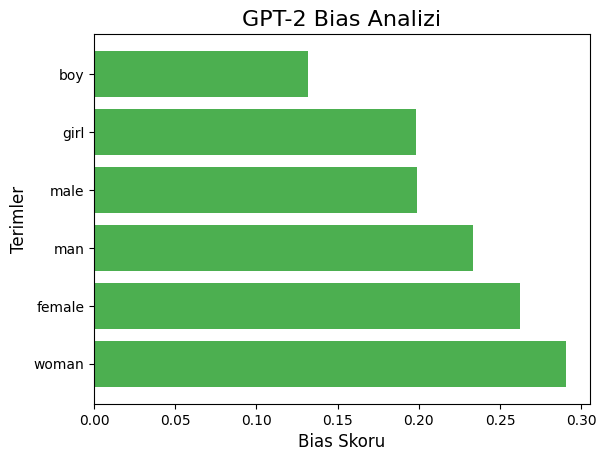

In [ ]:
import matplotlib.pyplot as plt

# Bias analizi sonuçları
bias_data = {
    'woman': 0.290902,
    'female': 0.262436,
    'man': 0.233156,
    'male': 0.198587,
    'girl': 0.198260,
    'boy': 0.131700
}
fig, ax = plt.subplots()
terms = list(bias_data.keys())
scores = list(bias_data.values())

ax.barh(terms, scores, color='#4CAF50')

ax.set_title('GPT-2 Bias Analizi', fontsize=16)
ax.set_xlabel('Bias Skoru', fontsize=12)
ax.set_ylabel('Terimler', fontsize=12)

plt.show()
